# Communicating Data findings - Prosper Loan

## by Pengfei Huangfu


## Preliminary Wrangling

This document explores Prosper Loan Dataset containing Borrower APR and attributes for approximately 113937 Loans.

In [1]:
# load all packages needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [2]:
# set figure size and figure format thus i dont need to set figsize later

plt.rcParams['figure.figsize'] = [8, 6]

In [3]:
# load prosper loan data into pandas dataframe

prosper_loan = pd.read_csv('prosperLoanData.csv')

In [4]:
prosper_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
# high_level overview of data shape and composition
print(prosper_loan.shape)
print(prosper_loan.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [6]:
# overview of dataset and check datatype and missing value 
prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [7]:
# descriptive statistics for numberic variables
print(prosper_loan.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

In [8]:
# take only the columns i am interested in

prosper_loan = prosper_loan.loc[:,('BorrowerAPR',
                        'EmploymentStatus',
                        'LoanOriginalAmount',
                        'LenderYield',
                        'Occupation',
                        'ProsperScore',
                        'StatedMonthlyIncome',
                        'BorrowerState')]

In [9]:
prosper_loan.head()

,BorrowerAPR,EmploymentStatus,LoanOriginalAmount,LenderYield,Occupation,ProsperScore,StatedMonthlyIncome,BorrowerState
0,0.16516,Self-employed,9425,0.1380,Other,NaN,3083.333333,CO
1,0.12016,Employed,10000,0.0820,Professional,7.0,6125.000000,CO
2,0.28269,Not available,3001,0.2400,Other,NaN,2083.333333,GA
3,0.12528,Employed,10000,0.0874,Skilled Labor,9.0,2875.000000,GA
4,0.24614,Employed,15000,0.1985,Executive,4.0,9583.333333,MN


In [10]:
# descriptive statistics for adjusted prosper loan dataset
print(prosper_loan.describe())

         BorrowerAPR  LoanOriginalAmount    LenderYield  ProsperScore  \
count  113912.000000        113937.00000  113937.000000  84853.000000   
mean        0.218828          8337.01385       0.182701      5.950067   
std         0.080364          6245.80058       0.074516      2.376501   
min         0.006530          1000.00000      -0.010000      1.000000   
25%         0.156290          4000.00000       0.124200      4.000000   
50%         0.209760          6500.00000       0.173000      6.000000   
75%         0.283810         12000.00000       0.240000      8.000000   
max         0.512290         35000.00000       0.492500     11.000000   

       StatedMonthlyIncome  
count         1.139370e+05  
mean          5.608026e+03  
std           7.478497e+03  
min           0.000000e+00  
25%           3.200333e+03  
50%           4.666667e+03  
75%           6.825000e+03  
max           1.750003e+06  


### what is the structure of your dataset?

the dataset has 113,937 observations with 81 columns.

### what is/are the main feature of interest in your data set?

there are 81 variables in total. It could be very hard and time-consuming to find the main features of interest by testing all one by one. As a student majoring in finance, and given my experience in machine learning, i decided to use Borrower APR as the dependent varible in my investigation. 

### What features in the dataset do you think will help support your investigation into your features of interest?

based on common sense and my understanding, i think the variables in my new prosper_loan dataframe which are: Term, EmploymentStatus, LoanOriginalAmount, LenderYield, Occupation, prosperScore, LoanStatus and StatedMonyhlyIncome should have impact on Borrower APR. after this project, we can find whether if these variables are good predictors to help company predict borrower's APR.

## Univariate Exploration

### Borrower APR

First, let us start with the main feature of interest: BorrowerAPR

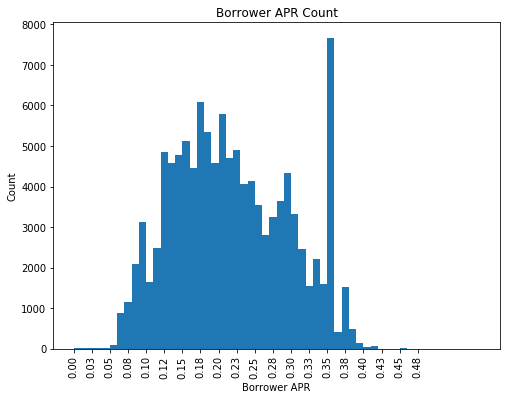

In [11]:
# start with a standard-scaled plot
bins = np.arange(0,prosper_loan['BorrowerAPR'].max()+0.05,0.01)
ticks =list(np.arange(0, 0.5, 0.025))
labels = ['{:.2f}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.xticks(rotation = 90); 

plt.hist(data = prosper_loan, x = 'BorrowerAPR',bins = bins);
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title('Borrower APR Count');

it is interesting to see that there is a spike at around 0.36. and the shape looks right skewed.

### Employment Status

next, i want to explore the distribution of employment status

Text(0.5, 1.0, 'Employment Status Distribution')

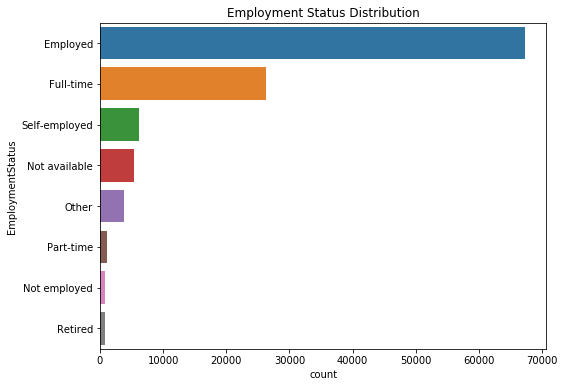

In [12]:
#Borrower Employment Status Distrobution
order = prosper_loan.EmploymentStatus.value_counts().index
sb.countplot(data = prosper_loan,y = 'EmploymentStatus', order = order);
plt.title('Employment Status Distribution')


the biggest group of people who get loans are employed people.

### LoanOriginalAmount

next, let us see the distribution of Loan Orginal Amount.

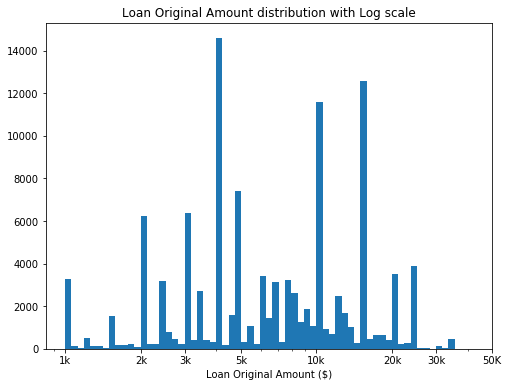

In [13]:
# Putting it in a log-scale
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(prosper_loan['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.hist(data = prosper_loan, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['1k', '2k','3k', '5k', '10k', '20k', '30k', '50K'])
plt.xlabel('Loan Original Amount ($)')
plt.title('Loan Original Amount distribution with Log scale')
plt.show()

there are spikes around 4k, 10k and 16k.

### Lender Yield

as one of the variable i most interested in, i want to know how lender yield distributed.

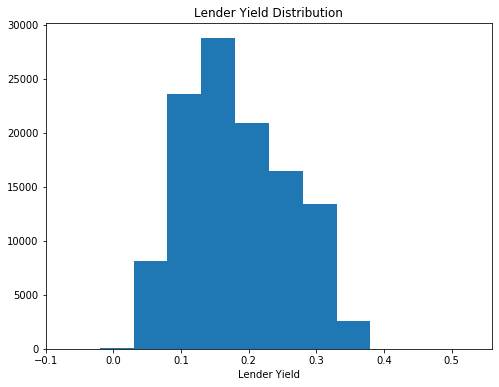

In [14]:
#Lender Yield Distribution
binsize = 0.05
bins = np.arange(-.07, prosper_loan['LenderYield'].max()+binsize, binsize)

plt.hist(data = prosper_loan, x = 'LenderYield', bins = bins)
plt.xlabel('Lender Yield')
plt.title('Lender Yield Distribution')

plt.show()

it looks like the average lender yield is around 0.2 and the shape of distribution is right skewed.

### Occupation

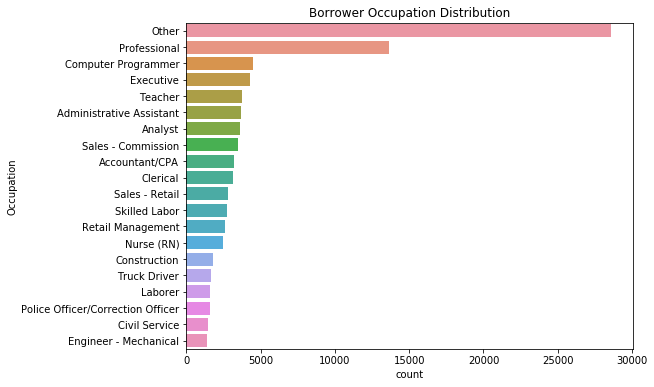

In [15]:
#Borrower Occupation Distrobution
order2 = prosper_loan.Occupation.value_counts().head(20).index
sb.countplot(data = prosper_loan,y = 'Occupation', order = order2);

plt.title('Borrower Occupation Distribution');

the most frequent types of occupation are others, professional and computer programmer.

### Prosper Score

let us explore another important variable.

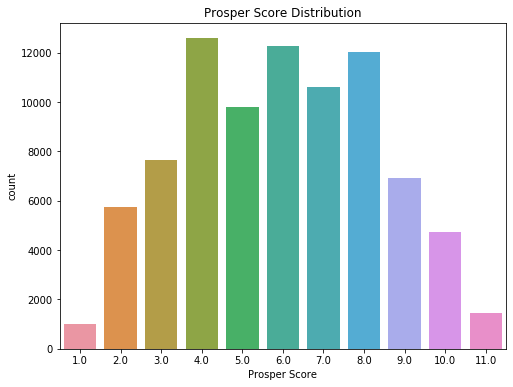

In [16]:
sb.countplot(data =prosper_loan,x= 'ProsperScore')

plt.title('Prosper Score Distribution')

plt.xlabel('Prosper Score');

the distribution of prosper score looks normal distributed. scores of 4, 6 and 8 are the most common rating.

### Stated Monthly Income

this should also be one of the most important variables, let us see how it distributes.

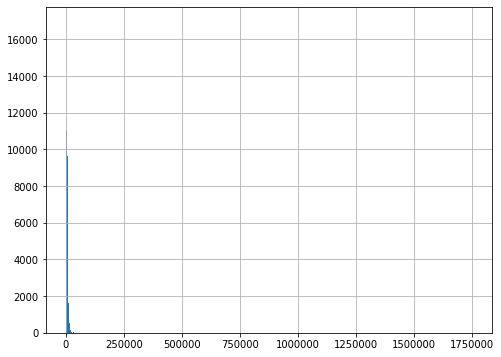

In [17]:
prosper_loan['StatedMonthlyIncome'].hist(bins = 2000)

there is some extreme values in monthly income, let us use log.

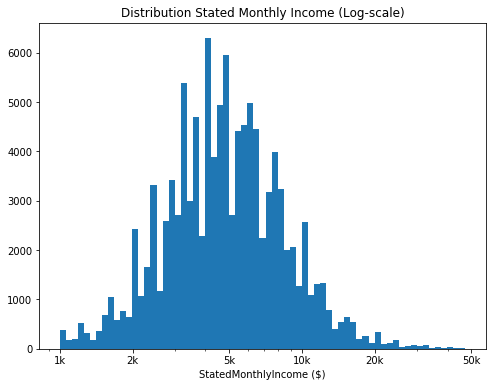

In [18]:
log_binsize = 0.025
bins = 10 ** np.arange(3, 4.7, log_binsize)
plt.hist(data = prosper_loan, x = 'StatedMonthlyIncome', bins = bins);

plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1k', '2k','5k', '10k', '20k', '50k'])
plt.xlabel('StatedMonthlyIncome ($)')
plt.title('Distribution Stated Monthly Income (Log-scale)');

plt.show();


the log-scale version of distribution looks normal, and it concentrated at around 5k.

### Borrower state

let us explore which states have more loans borrowed.

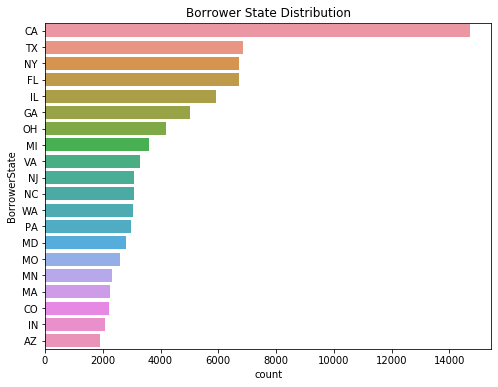

In [19]:
#Borrower State Distrobution
order3 = prosper_loan.BorrowerState.value_counts().head(20).index
sb.countplot(data = prosper_loan,y = 'BorrowerState',order = order3);

plt.title('Borrower State Distribution');

CA, TX and NY are the most frequent categories.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

my univariate exploration starts from Borrower APR. it is interesting to see that the distribution of Borrower APR is right skewed and there is one spike around 0.36. there are no need to perform any transformation here.

when i plot the distribution of stated monthly income, i found that thre are some outliers which are very far away from the mean. therefore, i log scaled the stated monthly income. and the loged version looks normal distributed.

it is make sense that the most frequent group of people who borrowed loan are employed people.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

as i mentioned before, the distribution of stated monthly income is kind of wired due to extreme values in the right tail. therefore, i translate the original plot into a log scaled one. after log scaled, the distribution becomes normal.

## Bivariate Exploration

next, let us investigate variables in pairs. 

in this stage, it is important to choose the right chart to plot the relationship between different types of variables. for example: numeric variable vs categorical variable

In [20]:
numerical_vars = ['BorrowerAPR','ProsperScore','StatedMonthlyIncome',
                'LoanOriginalAmount', 'LenderYield']

categorical_vars = ['Occupation','EmploymentStatus','BorrowerState']
        

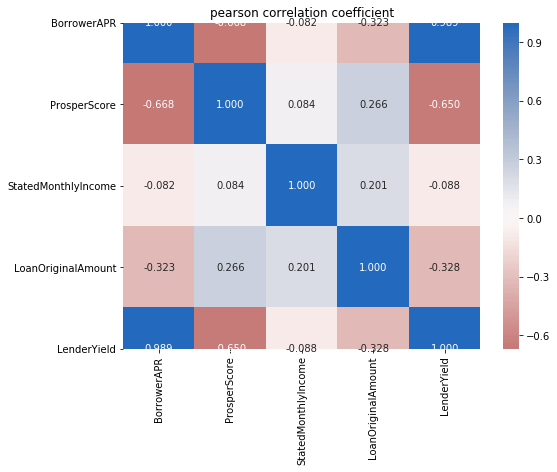

In [21]:
# pearson correlation coefficient

sb.heatmap(prosper_loan[numerical_vars].corr(), annot = True, fmt = '.3f',
          cmap = 'vlag_r', center = 0)

plt.title('pearson correlation coefficient')
plt.margins(x = 0.5, y= 0.3)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


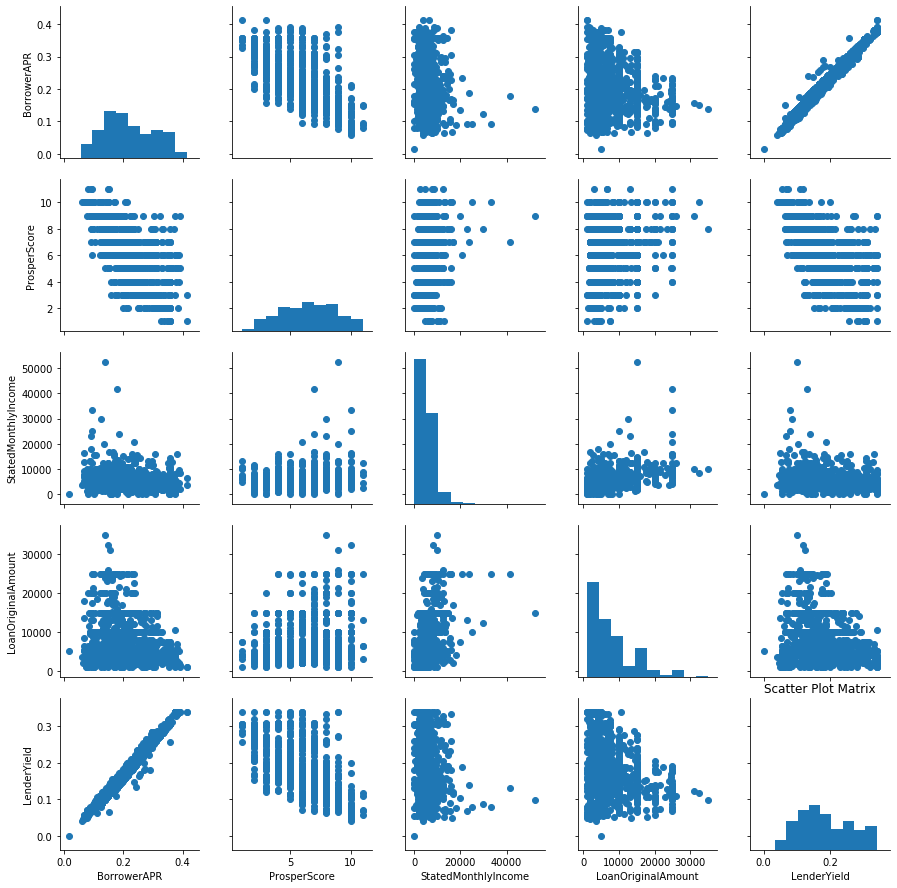

In [22]:
# Taking a sample of 1000 loans 
samples = np.random.choice(prosper_loan.shape[0],1000 , replace = False)
loan_sample = prosper_loan.loc[samples,:]

# Building a grid of scatter plots
g = sb.PairGrid(data = loan_sample, vars = numerical_vars)
g.map_offdiag(plt.scatter)
g = g.map_diag(plt.hist, bins = 10)
plt.title('Scatter Plot Matrix');

implictions from pearson correlation coefficient table and scatterplot:

from the correlation matrix, we can notice that the coefficient of correlation for lender yield and borrower APR is 0.989 which means there is a very strong and positive relationship between Lender Yield and Borroewr APR.

Prosper Score is moderately and negatively correlated with Borrower APR, and the coefficient is -0.668. this makes sense in real life, a person have a higher credit rating usually get lower yield due to lower default risk.

since lender yield and borrower apr are very strongly correlated with each other, it is not suprising to see that prosper score also moderately and negatively correlated with lender yied.

the other observation for this two table is: loan original amount is negatively correlated to Borrower APR, which means higher loan original amount leads to lower borrwer APR.

let us futher explore these relationships.

### Lender Yield vs Borrower APR

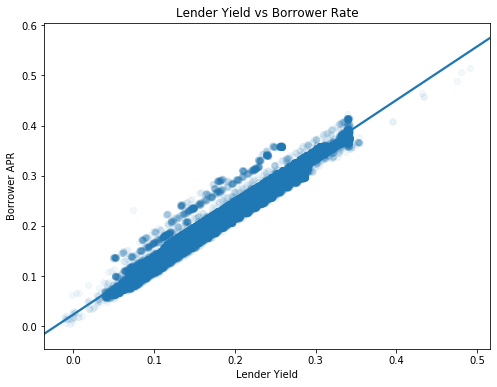

In [23]:
sb.regplot(data =prosper_loan, x = 'LenderYield', y = 'BorrowerAPR', 
            x_jitter = 0.002, y_jitter = 0.002, scatter_kws={'alpha':1/20});


plt.xlabel('Lender Yield')
plt.ylabel('Borrower APR')
plt.title('Lender Yield vs Borrower Rate');

This is consistent with what i expected.

### Prosper Score vs Borrwer APR

In [24]:
# add jitter function

def rand_jitter(x, jitter = 0.3, random_state = 42):
    rnd_state = np.random.RandomState(random_state)
    return x + rnd_state.uniform(-jitter, +jitter, x.shape)

# add jitter to Prosper Score
prosper_loan['ProsperScore_jitter'] = rand_jitter(prosper_loan.ProsperScore)

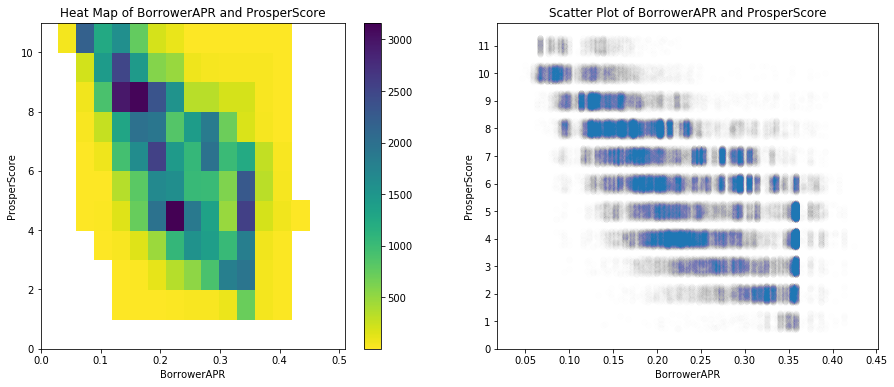

In [25]:
# relation between ProsperScore and BorrowerAPR
plt.figure(figsize=[15,6])
#heatmap
plt.subplot(1, 2, 1)
bins_x = np.arange(0, prosper_loan['BorrowerAPR'].max()+0.02, 0.03)
bins_y = np.arange(0, prosper_loan['ProsperScore'].max()+1, 1)
plt.hist2d(data =prosper_loan, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)

plt.colorbar()
plt.title('Heat Map of BorrowerAPR and ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore');

#scatterplot
plt.subplot(1, 2, 2)
plt.scatter(data = prosper_loan, x = 'BorrowerAPR', y = 'ProsperScore_jitter', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('Scatter Plot of BorrowerAPR and ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore');

this also consistent with our analysis before, higher prosper score will lead to lower Borrwoer APR.

### ProsperScore vs LenderYield

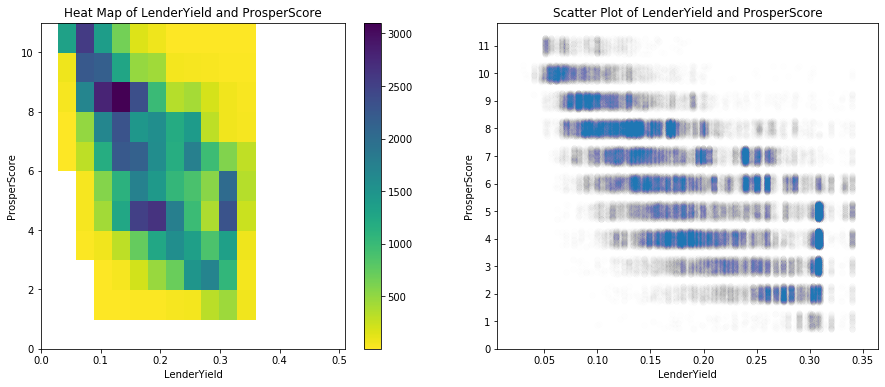

In [26]:
# Checking the relation between lenderyield and prosperscore.
plt.figure(figsize = [15, 6]) 

plt.subplot(1, 2, 1)
bins_x = np.arange(0,prosper_loan['LenderYield'].max()+0.02, 0.03)
bins_y = np.arange(0, prosper_loan['ProsperScore'].max()+1, 1)
plt.hist2d(data = prosper_loan, x = 'LenderYield', y = 'ProsperScore', bins = [bins_x, bins_y], 
                cmap = 'viridis_r', cmin = 0.5)

plt.colorbar()
plt.title('Heat Map of LenderYield and ProsperScore')
plt.xlabel('LenderYield')
plt.ylabel('ProsperScore');

plt.subplot(1, 2, 2)
plt.scatter(data = prosper_loan, x = 'LenderYield', y = 'ProsperScore_jitter', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('Scatter Plot of LenderYield and ProsperScore')
plt.xlabel('LenderYield')
plt.ylabel('ProsperScore');

### Prosper score vs Borrower APR

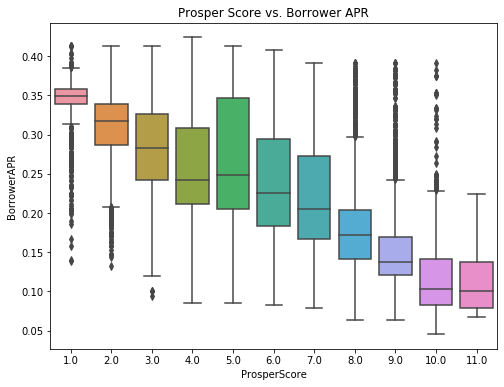

In [27]:
# boxplot the relationship between prosper score and borrower apr
sb.boxplot(data = prosper_loan,x = 'ProsperScore',y = 'BorrowerAPR');
plt.xlabel('ProsperScore');
plt.ylabel('BorrowerAPR');
plt.title('Prosper Score vs. Borrower APR');

it is very clear that as the Prosper score goes up, the borrower APR goes down.

### Employment Status vs Borrower APR

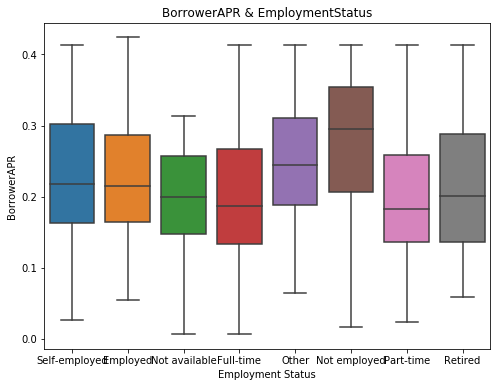

In [28]:
sb.boxplot(data = prosper_loan,y = 'BorrowerAPR',x = 'EmploymentStatus');
plt.ylabel('BorrowerAPR');
plt.xlabel('Employment Status');
plt.title('BorrowerAPR & EmploymentStatus');

people with job seems to have lower borrower apr than unemployed people

### Loan original amount vs borrower APR

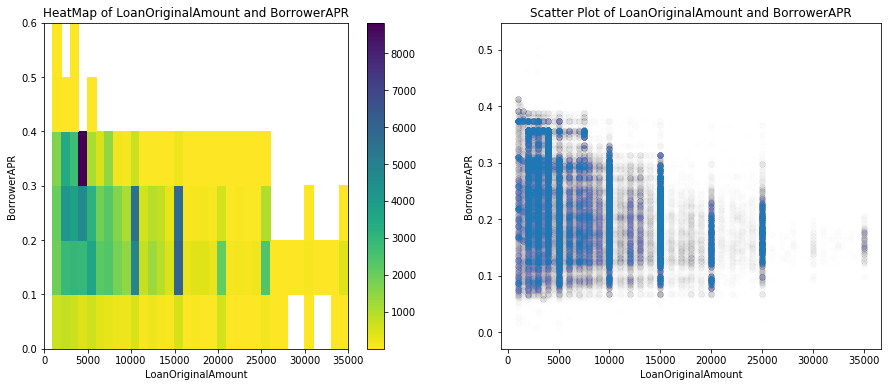

In [29]:
# similar code to previous heat map
plt.figure(figsize = [15, 6]) 

#heatmap
plt.subplot(1, 2, 1)
bins_x = np.arange(0,prosper_loan['LoanOriginalAmount'].max()+1000, 1000)
bins_y = np.arange(0, prosper_loan['BorrowerAPR'].max()+0.1, 0.1)

plt.hist2d(data = prosper_loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR')
plt.title('HeatMap of LoanOriginalAmount and BorrowerAPR')
plt.colorbar()

#scatter plot
plt.subplot(1, 2, 2)
plt.scatter(data = prosper_loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR',  alpha =  0.005)
plt.yticks(np.arange(0, 0.6, 0.1))
plt.title('Scatter Plot of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');

the relationship is a little bit weak, but overall, larger original amount of loan will leads to lower borrower apr.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

in this stage:

i noticed that lender Yield is strongly related to Borrower APR, a higher Lender yield leads to a higher Borrower APR.

The Prosper Score is negatively related to both borrower APR and Lender Yield. a higher credit rating leads to a lower borrower apr and Lender Yield.

loan riginal amount is gegatively related to borrower APR, but the coefficient shows that the relationship is weak.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

people with job tend to have lower borrower APR than unemployed people. this makes sense in real life, people with job has more ability to repay which means lower risk.

## Multivariate Exploration

last stage

### BorrowerAPR vs Prosper Score and LoanOriginal Amount

firstly, let us explore the relationship between borrower apr, prosper score and  loan original amount.

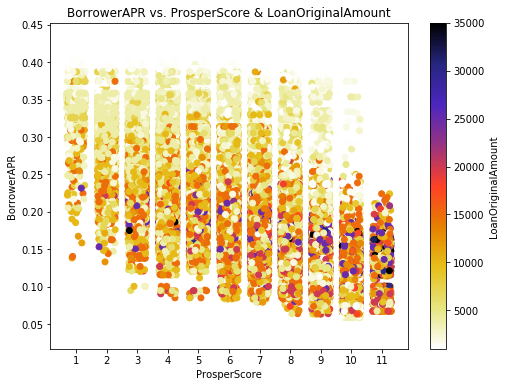

In [30]:
cm = plt.cm.get_cmap('CMRmap_r')
plt.scatter(data = prosper_loan,
            x = 'ProsperScore_jitter', y = 'BorrowerAPR', c ='LoanOriginalAmount', cmap=cm) 

plt.colorbar(label = 'LoanOriginalAmount')

plt.title('BorrowerAPR vs. ProsperScore & LoanOriginalAmount')

plt.xlabel('ProsperScore')

plt.ylabel('BorrowerAPR');

plt.xticks(np.arange(1,12), np.arange(1,12));

we can see that loans with larger amount are taken by people with higher credit rating.

### different type of employment vs borrower APR and ProsperScore

In [31]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(0, 12, 1)
    bins_y = np.arange(0, 0.6, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


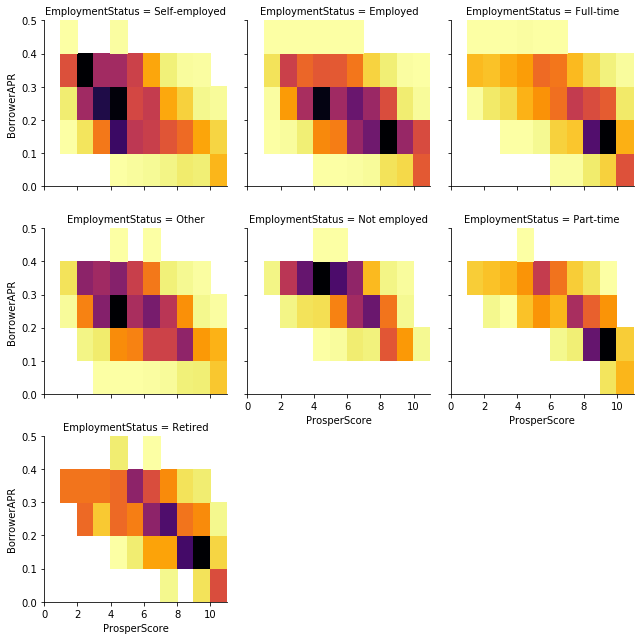

In [32]:
# create faceted heat maps on the EmploymentStatus
g = sb.FacetGrid(data = prosper_loan[prosper_loan['EmploymentStatus'] != 'Not available'],\
                 col = 'EmploymentStatus', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'ProsperScore', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('ProsperScore')
g.set_ylabels('BorrowerAPR');

Interesting implictions:

1.Full-Time and part-time tend to have higher ProsperScore and lower BorrowerAPR

2.Not-Employed & Self-Employed tend to have lower ProsperScore and higher BorrowerAPR

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

firstly, i investigate the relationship among BorrowerAPR, Prosper Score and LoanOriginal Amount and find that larger original amount of loan are taken by people with higher rating.

secondly, i checked the relationship among different type of employment, borrower APR and ProsperScore and find that employed people tend to have higher credit rating and lower borrower APR than unemployed people.

### Were there any interesting or surprising interactions between features?

it is suprising to see retired people also have a relatively high borrower APR even though some of them may have good rating.